<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


**For the "Median value of owner-occupied homes" provide a boxplot**

Text(0, 0.5, 'Median value of owner-occupied homes')

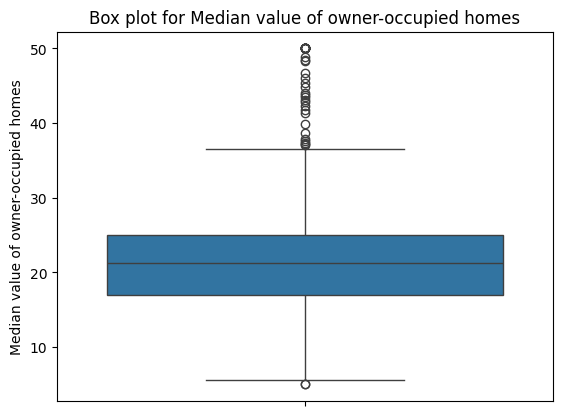

In [59]:
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title("Box plot for Median value of owner-occupied homes")
pyplot.ylabel('Median value of owner-occupied homes')

**Provide a  bar plot for the Charles river variable**

Text(0.5, 0, 'Charles River bounds')

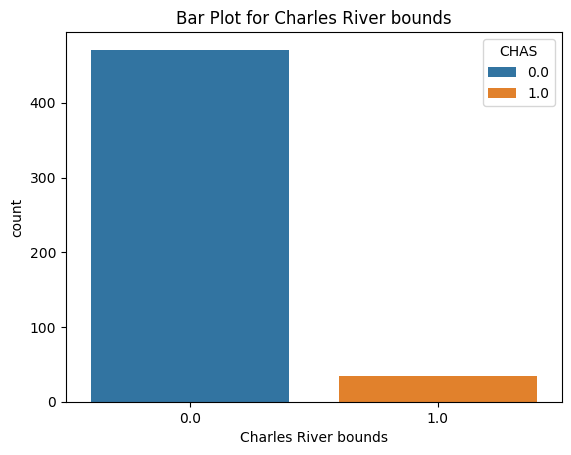

In [60]:
ax= sns.countplot(x='CHAS', data = boston_df, hue='CHAS')
ax.set_title("Bar Plot for Charles River bounds")
pyplot.xlabel('Charles River bounds')
# the majority of the houses don't have bounds with the river

**Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

In [55]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

Text(0, 0.5, 'Median value of owner-occupied homes')

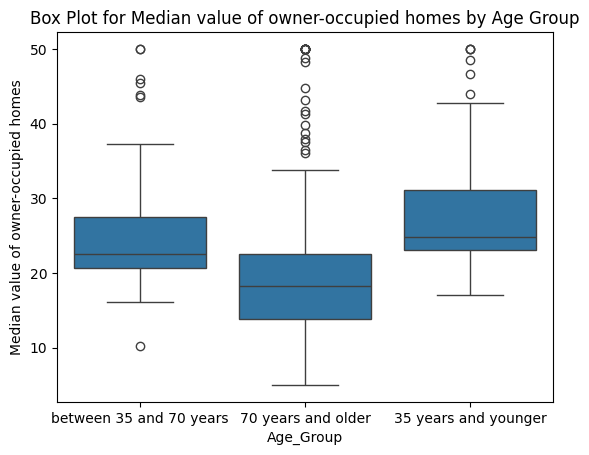

In [62]:
ax = sns.boxplot(y='MEDV', x='Age_Group', data=boston_df)
ax.set_title("Box Plot for Median value of owner-occupied homes by Age Group")
pyplot.ylabel('Median value of owner-occupied homes')
# The median value of owner-occupied homes for the group of 35 and younger is hihger than the others groups

**Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

Text(0.5, 1.0, 'Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

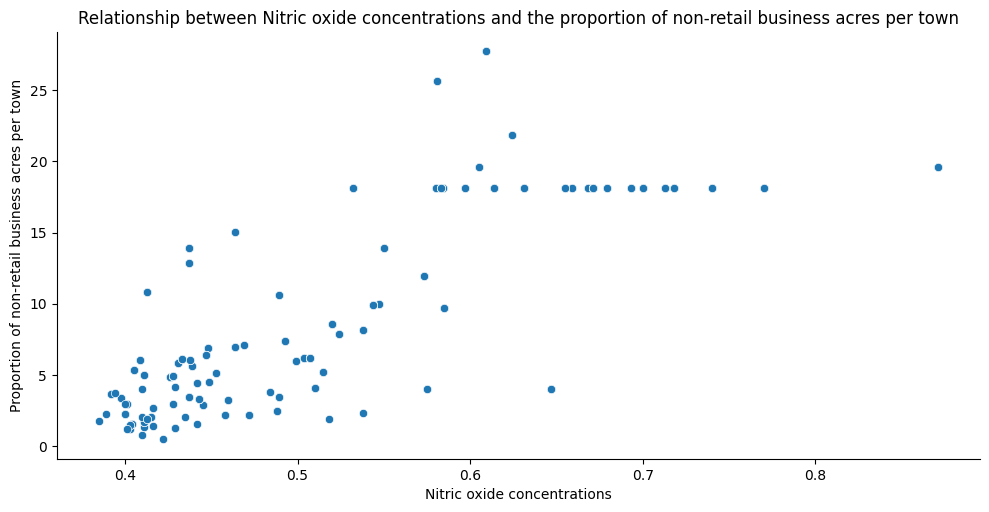

In [57]:
sns.relplot(x="NOX", y="INDUS", data=boston_df , height = 5, aspect =2)
pyplot.xlabel('Nitric oxide concentrations')
pyplot.ylabel('Proportion of non-retail business acres per town')
pyplot.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
# When the proportion if non retail business acres per town increase the nitric oxide concentraions decrease

**Create a histogram for the pupil to teacher ratio variable**

Text(0.5, 1.0, 'Pupil-Teacher Ratio by Town')

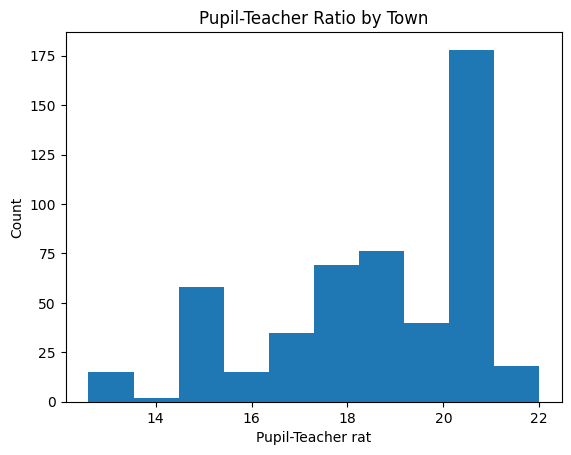

In [58]:
pyplot.hist(boston_df['PTRATIO'])
pyplot.xlabel('Pupil-Teacher rat')
pyplot.ylabel('Count')
pyplot.title('Pupil-Teacher Ratio by Town')
# The more common pupil to teacher ratio is 21


**Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

In [79]:
# null hypothesis:  there is no difference in median value of houses bounded by Charles river
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

# Since the p-value is less than 0.05, we will reject the hypothesis, there is a significant difference in median value of houses bounded by Charles river

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

In [80]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

In [81]:
scipy.stats.levene(boston_df[boston_df['Age_Group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['Age_Group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['Age_Group'] == '70 years and older']['MEDV'], 
                   center='median')

LeveneResult(statistic=3.471820890881101, pvalue=0.031806778061338456)

In [82]:
thirty_five_lower = boston_df[boston_df['Age_Group'] == '35 years and younger']['MEDV']
thirty_five_seventy = boston_df[boston_df['Age_Group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['Age_Group'] == '70 years and older']['MEDV']

In [83]:
#  null hypothesis: there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940
f_statistic, p_value = scipy.stats.f_oneway(thirty_five_lower, thirty_five_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

# Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the median values of houses  for each proportion of owner occupied units built prior to 1940.

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

In [84]:
#  null hypothesis: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])
# Since the p-value is less than 0.05, we will reject the null hypothesis, there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

In [86]:
#  null hypothesis: there is no relationship between the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
scipy.stats.pearsonr(boston_df['DIS'],boston_df['MEDV'])
# Since the p-value is less than 0.05, we will reject the null hypothesis and conclude there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes 

PearsonRResult(statistic=0.2499287340859039, pvalue=1.2066117273371074e-08)